# 01 - Data Inspection

## Goal
- Load the raw retail sales dataset.
- Inspect its structure (rows, columns, data types).
- Identify key columns (dates, sales values, categorical fields).
- Check for missing values and data quality issues.
- Understand which columns will be useful for time series forecasting.


In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Path to your raw dataset
file_path = "../data/raw/train.csv"

# Load CSV
df = pd.read_csv(file_path)

# Show shape & first rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (9800, 18)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
# Check column names, data types, and non-null counts
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
# Check which columns look like dates
date_cols = [c for c in df.columns if "date" in c.lower()]
print("Possible date columns:", date_cols)

for col in date_cols:
    print(f"\nColumn: {col}")
    print(df[col].head(5))


Possible date columns: ['Order Date', 'Ship Date']

Column: Order Date
0    08/11/2017
1    08/11/2017
2    12/06/2017
3    11/10/2016
4    11/10/2016
Name: Order Date, dtype: object

Column: Ship Date
0    11/11/2017
1    11/11/2017
2    16/06/2017
3    18/10/2016
4    18/10/2016
Name: Ship Date, dtype: object


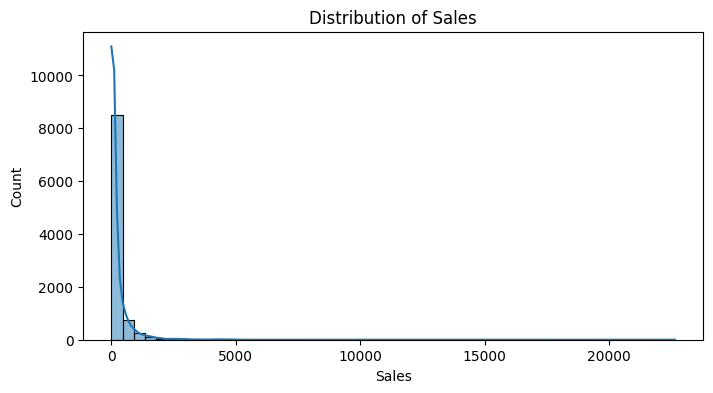

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.show()


### Notes from Data Inspection
- Dataset: 9800 rows × 18 columns.
- Target variable: Sales.
- Relevant date: Order Date (when sale was made).
- Ship Date not needed for forecasting.
- Missing values only in Postal Code (irrelevant).
- Next: convert Order Date to datetime and aggregate daily sales.
